# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
[urban_ride_count.head(), suburban_ride_count.head(), rural_ride_count.head()]

[city
 Amandaburgh        18
 Barajasview        22
 Carriemouth        27
 Christopherfurt    27
 Deanville          19
 Name: ride_id, dtype: int64,
 city
 Barronchester    16
 Bethanyland      18
 Brandonfort      19
 Colemanland      22
 Davidfurt        17
 Name: ride_id, dtype: int64,
 city
 Bradshawfurt      10
 Garzaport          3
 Harringtonfort     6
 Jessicaport        6
 Lake Jamie         6
 Name: ride_id, dtype: int64]

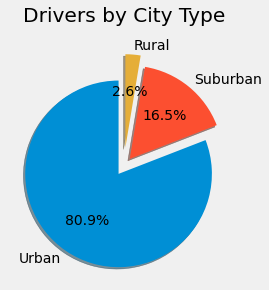

In [41]:
# 2. Get the total drivers for each city type
# Get the TOTAL number of drivers for each urban city.
urban_driver_count = city_data_df.groupby('type').sum().loc['Urban']
# Get the TOTAL number of drivers for each city for the suburban and rural cities.
rural_driver_count = city_data_df.groupby('type').sum().loc['Rural']
suburban_driver_count = city_data_df.groupby('type').sum().loc['Suburban']


chartTheseData = [urban_driver_count.sum(), suburban_driver_count.sum(), rural_driver_count.sum()]

plt.pie(chartTheseData, labels=['Urban', 'Suburban', 'Rural'], shadow= True, startangle=90, explode=[.1,.1,.2], autopct='%1.1f%%')
plt.title('Drivers by City Type\n')
plt.savefig('Resources/pie.jpg')
plt.show()

In [5]:
#  3. Get the total amount of fares for each city type
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
[urban_avg_fare.head(), suburban_avg_fare.head(), rural_avg_fare.head()]

[city
 Amandaburgh        24.641667
 Barajasview        25.332273
 Carriemouth        28.314444
 Christopherfurt    24.501852
 Deanville          25.842632
 Name: fare, dtype: float64,
 city
 Barronchester    36.422500
 Bethanyland      32.956111
 Brandonfort      35.437368
 Colemanland      30.894545
 Davidfurt        31.995882
 Name: fare, dtype: float64,
 city
 Bradshawfurt      40.064000
 Garzaport         24.123333
 Harringtonfort    33.470000
 Jessicaport       36.013333
 Lake Jamie        34.358333
 Name: fare, dtype: float64]

In [6]:
#  4. Get the average fare per ride for each city type. 
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [7]:
# 5. Get the average fare per driver for each city type. 

urban_fares = urban_cities_df["fare"].sum()
urban_fare_per_driver = urban_fares / urban_driver_count.sum()
suburban_fares = suburban_cities_df["fare"].sum()
suburban_fare_per_driver = suburban_fares / suburban_driver_count.sum()
rural_fares = rural_cities_df["fare"].sum()
rural_fare_per_driver = rural_fares / rural_driver_count.sum()
[urban_fare_per_driver, suburban_fare_per_driver, rural_fare_per_driver]

[16.571467775467777, 39.50271428571429, 55.486282051282046]

In [8]:

urban_fares = urban_cities_df["fare"].sum()
suburban_fares = suburban_cities_df["fare"].sum()
rural_fares = rural_cities_df["fare"].sum()


In [9]:
#  6. Create a PyBer summary DataFrame. 

summary = ({'type': ['urban', 'suburban', 'rural'],
                    'Total Rides': [int(urban_ride_count.sum()), int(suburban_ride_count.sum()), int(rural_ride_count.sum())],
                    'Total Drivers': [int(urban_driver_count.sum()), int(suburban_driver_count.sum()), int(rural_driver_count.sum())],
                    'Total Fares': [float(urban_fares), float(suburban_fares), float(rural_fares)], 
                    'Average Fare per Ride': [float(urban_avg_fare.mean()), float(suburban_avg_fare.mean()), float(rural_avg_fare.mean())],
                    'Average Fare per Driver': [float(urban_fare_per_driver.mean()), float(suburban_fare_per_driver.mean()), float(rural_fare_per_driver.mean())]           
            })

pyber_summary_df = pd.DataFrame(data=summary)


pyber_summary_df

,type,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,urban,1625,2405,39854.38,24.499122,16.571468
1,suburban,625,490,19356.33,30.737298,39.502714
2,rural,125,78,4327.93,34.637765,55.486282


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df = pyber_summary_df.set_index('type')
pyber_summary_df.index.name = None

In [11]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map("{:,d}".format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map("${:,.2f}".format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map("${:,.2f}".format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map("${:,.2f}".format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
urban,"1,625","$2,405.00","$39,854.38",$24.50,$16.57
suburban,625,$490.00,"$19,356.33",$30.74,$39.50
rural,125,$78.00,"$4,327.93",$34.64,$55.49


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pdd = pyber_data_df

In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

pyber_data_df['date'] = pd.to_datetime(pyber_data_df['date']).dt.date
newpyberdata = [pyber_data_df.groupby('date').sum()['fare'], pyber_data_df['type']]
pyberdf = pd.DataFrame(newpyberdata)
pyberdf

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2365,2366,2367,2368,2369,2370,2371,2372,2373,2374
fare,299.99,633.03,413.86,303.71,608.25,312.36,373.03,456.0,413.85,554.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural


In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyberdf = pyberdf.reset_index()


In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pybertable = pd.pivot_table(pyber_data_df,index=['date'],columns=['type'],values=['fare'])
pybertable = pybertable.reset_index().set_index('date')


In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber2 = pd.DataFrame(pyber_data_df.groupby(['date']))
pyber2.loc[(pd.to_datetime(pyber2[0]) > '2019-01-01') & (pd.to_datetime(pyber2[0]) <= '2019-04-29')]

,0,1
1,2019-01-02,city date fare ...
2,2019-01-03,city date fare ...
3,2019-01-04,city date fare ...
4,2019-01-05,city date fare ...
5,2019-01-06,city date fare ...
...,...,...
114,2019-04-25,city date fare ...
115,2019-04-26,city date fare ...
116,2019-04-27,city date fare ...
117,2019-04-28,city date fare ...


In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_data_df.index = pd.to_datetime(pyber_data_df.index)

In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000002374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

pyber_data_df = pyber_data_df.set_index('date')
pyber_data_df.index.name = None

pyber_data_df.index = pd.to_datetime(pyber_data_df.index)
pyber_data_df = pyber_data_df.resample('W').sum()

pyber_data_df.head(12)

,fare,ride_id,driver_count
2019-01-06,2571.20,472361995260640,3036
2019-01-13,3223.21,569205766678515,3208
2019-01-20,3463.22,630092657779317,3797
2019-01-27,3512.48,566634582685517,3037
2019-02-03,3462.81,685891273552145,4113
2019-02-10,3252.78,627907996674139,3884
2019-02-17,3376.39,645834233510409,3487
2019-02-24,4298.09,775084955479501,4609
2019-03-03,3251.80,534915154281766,3706
2019-03-10,3700.14,667915863238038,4286


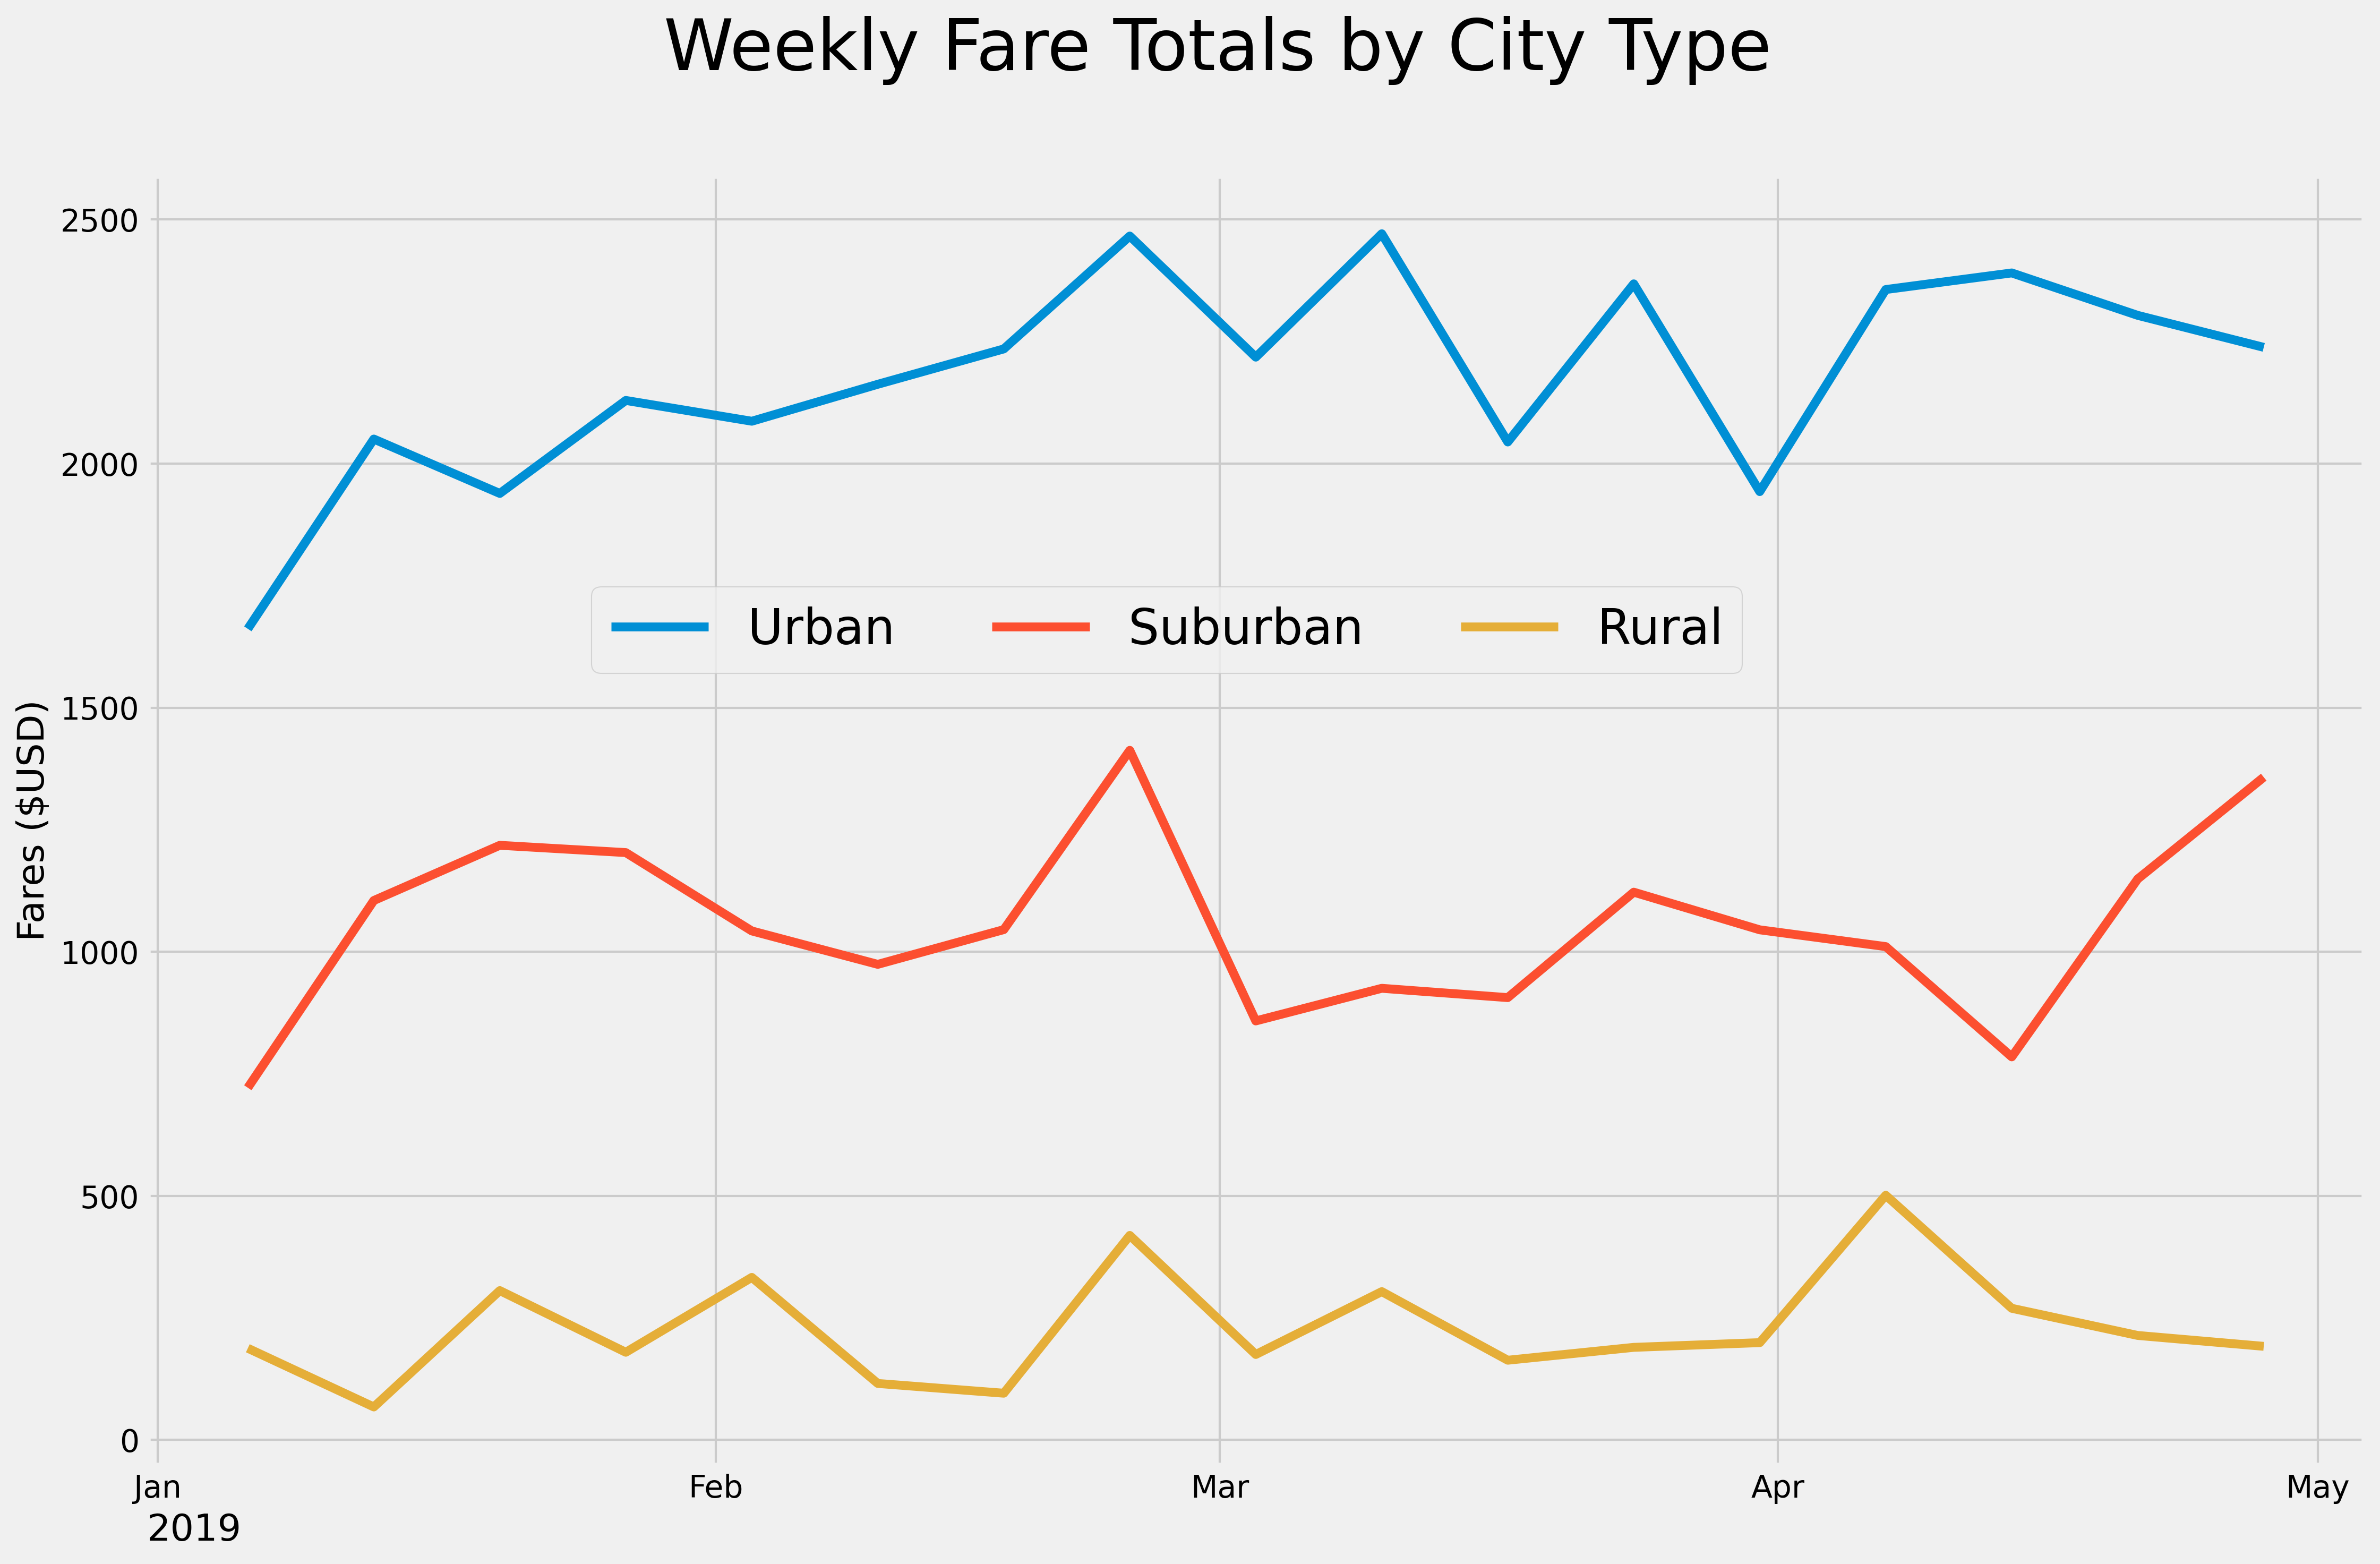

In [20]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax1 = plt.subplots()
fig.set_size_inches(16,10)
fig.set_dpi(300)
fig.suptitle('Weekly Fare Totals by City Type', fontsize=32)

# Calculate Urban Weekly Results
urbanpdd = pdd[pdd['type'] == "Urban"]
urbanpdd = urbanpdd.set_index(urbanpdd['date'])
urbanpdd.index = pd.to_datetime(urbanpdd.index)
urbanpdd = urbanpdd.resample('W').sum()
urbanpdd.index.name = None
urbanfare = urbanpdd['fare'].loc['2019-01-01':'2019-04-29']

ax1.set_ylabel("Fares ($USD)")
ax1.set_xlabel("2019", loc="left")
ax1.plot(urbanfare.index, urbanfare, label="Urban")
  
# Calculate Suburban Weekly Results
suburbanpdd = pdd[pdd['type'] == "Suburban"]
suburbanpdd = suburbanpdd.set_index(suburbanpdd['date'])
suburbanpdd.index = pd.to_datetime(suburbanpdd.index)
suburbanpdd = suburbanpdd.resample('W').sum()
suburbanpdd.index.name = None
suburbanfare = suburbanpdd['fare'].loc['2019-01-01':'2019-04-29']

# Generate the Suburban Plot
ax1.plot(suburbanfare.index, suburbanfare, label="Suburban")

# Calculate Rural Weekly Results
ruralpdd = pdd[pdd['type'] == "Rural"]
ruralpdd = ruralpdd.set_index(ruralpdd['date'])
ruralpdd.index = pd.to_datetime(ruralpdd.index)
ruralpdd = ruralpdd.resample('W').sum()
ruralpdd.index.name = None
ruralfare = ruralpdd['fare'].loc['2019-01-01':'2019-04-29']

# Generate the Rural Plot
ax1.plot(ruralfare.index, ruralfare, label="Rural")

# Move the Legend
plt.rcParams['legend.fontsize'] = 22
plt.legend(loc="upper center", bbox_to_anchor=(0.46, 0.7), ncol=3)


ax1.xaxis.set_major_locator(mdates.MonthLocator())
date_form = DateFormatter("%b")
ax1.xaxis.set_major_formatter(date_form)

plt.savefig('Resources/weekly.jpg')
# Show the Graph
plt.show()
